### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Deep Analysis of Variables and Correlation with Star Rating

## 1.1 Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('reviews_sentiment.csv', sep=';')

# Display the first few rows
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


## 1.2 Handle Missing Values (Imputation)

In [3]:
# Check for missing values
df.isnull().sum()

Review Title       0
Review Text        0
wordcount          0
titleSentiment    26
textSentiment      0
Star Rating        0
sentimentValue     0
dtype: int64

We'll impute them using the mode

In [4]:
# Impute missing values in 'titleSentiment' with the mode
df['titleSentiment'] = df['titleSentiment'].fillna(df['textSentiment'])

In [5]:
# Verify that there are no more missing values
df['titleSentiment'].isnull().sum()

np.int64(0)

Updating the enconding of titleSentiment and textSentiment

In [6]:
# Map 'negative' to 0 and 'positive' to 1
sentiment_mapping = {'negative': 0, 'positive': 1}

df['titleSentiment_encoded'] = df['titleSentiment'].map(sentiment_mapping)
df['textSentiment_encoded'] = df['textSentiment'].map(sentiment_mapping)

In [7]:
# Check the unique values after encoding
print('Unique values in titleSentiment_encoded:', df['titleSentiment_encoded'].unique())
print('Unique values in textSentiment_encoded:', df['textSentiment_encoded'].unique())

Unique values in titleSentiment_encoded: [0 1]
Unique values in textSentiment_encoded: [0 1]


In [8]:
# Count the number of rows where 'titleSentiment' and 'textSentiment' have the same value
same_sentiment_count = df[df['titleSentiment_encoded'] == df['textSentiment_encoded']].shape[0]
print(f"Number of rows where 'titleSentiment' and 'textSentiment' have the same value: {same_sentiment_count}")


Number of rows where 'titleSentiment' and 'textSentiment' have the same value: 221


## 1.3 Descriptive Statistics

In [9]:
# Numerical variables
df.describe()

,wordcount,Star Rating,sentimentValue,titleSentiment_encoded,textSentiment_encoded
count,257.000000,257.000000,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849,0.844358,0.821012
std,13.159812,1.409531,0.897987,0.363223,0.384091
min,1.000000,1.000000,-2.276469,0.000000,0.000000
25%,3.000000,3.000000,-0.108144,1.000000,1.000000
50%,7.000000,3.000000,0.264091,1.000000,1.000000
75%,16.000000,5.000000,0.808384,1.000000,1.000000
max,103.000000,5.000000,3.264579,1.000000,1.000000


### Distribution of Star Raiting

- Visualizes how many reviews fall into each star rating.
- Helps identify if the dataset is balanced or skewed.

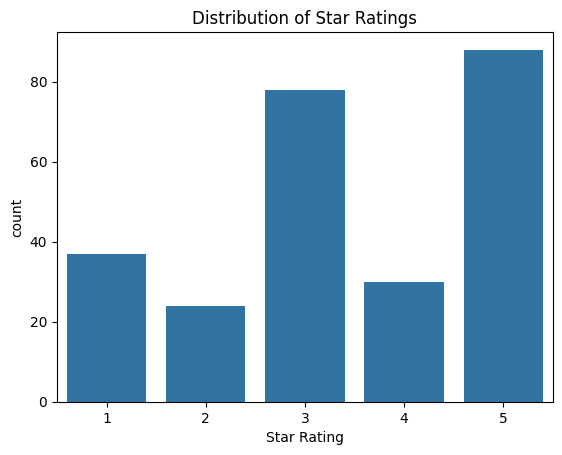

In [10]:
# Plot the distribution of 'Star Rating'
sns.countplot(x='Star Rating', data=df)
plt.title('Distribution of Star Ratings')
plt.show()

### Statistics for wordcount and sentimentValue

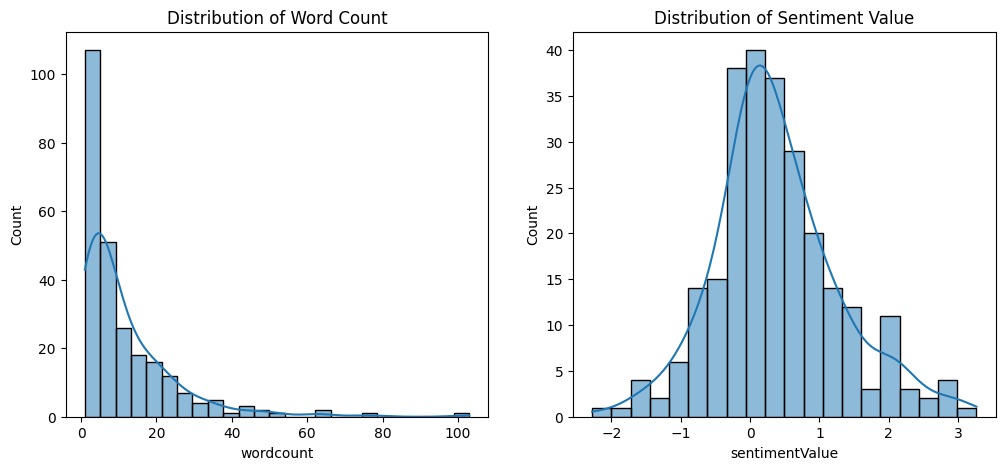

In [11]:
# Histograms for 'wordcount' and 'sentimentValue'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['wordcount'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Word Count')

sns.histplot(df['sentimentValue'], kde=True, ax=ax[1])
ax[1].set_title('Distribution of Sentiment Value')

plt.show()

### Statistics for titleSentiment and textSentiment

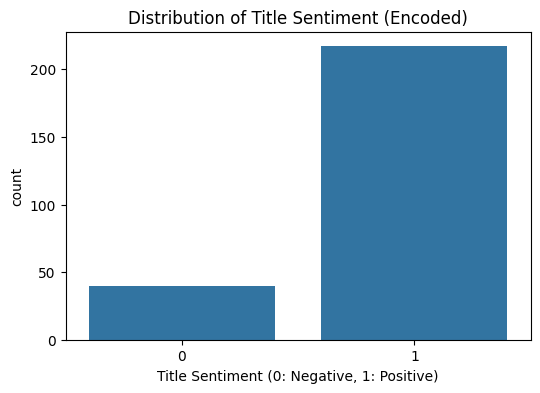

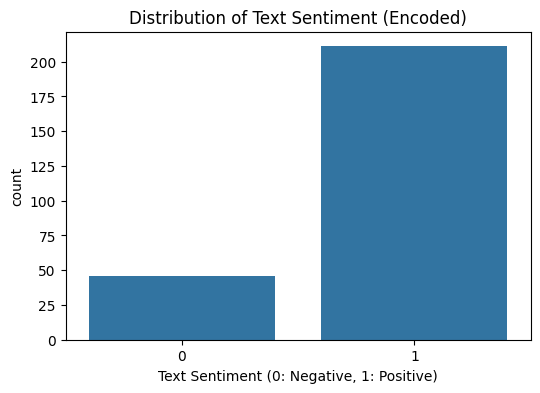

In [12]:
# Plot distribution of titleSentiment_encoded
plt.figure(figsize=(6, 4))
sns.countplot(x='titleSentiment_encoded', data=df)
plt.title('Distribution of Title Sentiment (Encoded)')
plt.xlabel('Title Sentiment (0: Negative, 1: Positive)')
plt.show()

# Plot distribution of textSentiment_encoded
plt.figure(figsize=(6, 4))
sns.countplot(x='textSentiment_encoded', data=df)
plt.title('Distribution of Text Sentiment (Encoded)')
plt.xlabel('Text Sentiment (0: Negative, 1: Positive)')
plt.show()

## 1.4 Correlation Analysis

- Spearman correlation is useful for ordinal data or non-linear relationships.
- It assesses how well the relationship between two variables can be described by a monotonic function.

Compute Pearson Correlation Coefficient

In [13]:
# Select relevant variables
corr_vars = ['wordcount', 'sentimentValue', 'titleSentiment_encoded', 'textSentiment_encoded', 'Star Rating']

# Compute correlation matrix
corr_matrix = df[corr_vars].corr(method='pearson')

# Display the correlation matrix
corr_matrix

,wordcount,sentimentValue,titleSentiment_encoded,textSentiment_encoded,Star Rating
wordcount,1.000000,-0.347232,-0.333361,-0.293601,-0.402059
sentimentValue,-0.347232,1.000000,0.310325,0.620797,0.792180
titleSentiment_encoded,-0.333361,0.310325,1.000000,0.499527,0.395294
textSentiment_encoded,-0.293601,0.620797,0.499527,1.000000,0.702266
Star Rating,-0.402059,0.792180,0.395294,0.702266,1.000000


Visualize Correlation Matrix

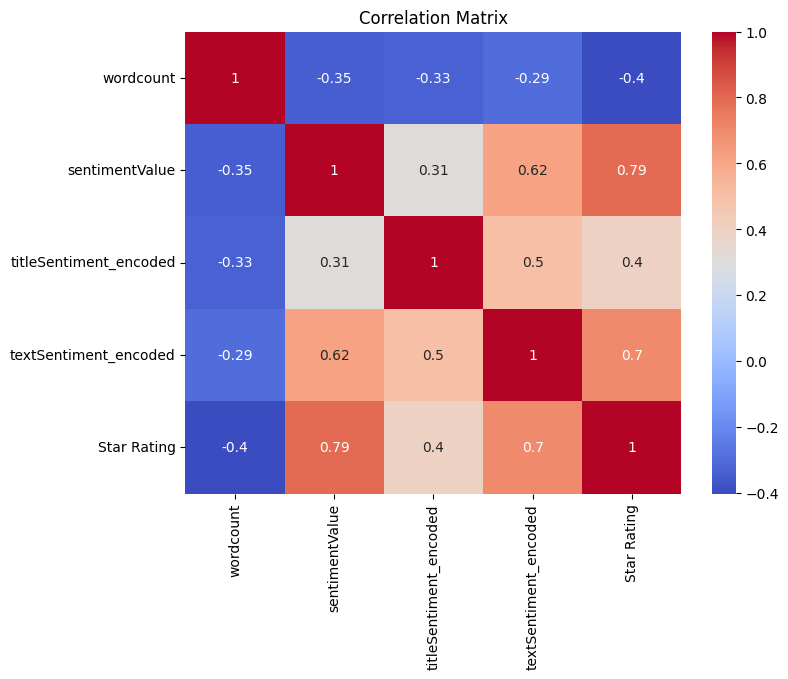

In [14]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 1.5 Information Gain with Shannon Entropy

- Variables with higher information gain are more significant in predicting Star Rating.
- This helps in feature selection for the model.

In [15]:
from scipy.stats import entropy

# Calculate the entropy of 'Star Rating'
star_rating_counts = df['Star Rating'].value_counts(normalize=True)
star_rating_entropy = entropy(star_rating_counts, base=2)
print(f"Entropy of 'Star Rating': {star_rating_entropy:.4f}")

Entropy of 'Star Rating': 2.1352


Compute Information Gain for Each Variable:

In [16]:
def information_gain(data, split_attribute, target_attribute='Star Rating'):
    # Calculate the entropy before the split
    total_entropy = entropy(data[target_attribute].value_counts(normalize=True), base=2)
    
    # Calculate the values and counts for the split attribute
    vals, counts = np.unique(data[split_attribute], return_counts=True)
    
    # Calculate the weighted entropy after the split
    weighted_entropy = 0
    for i in range(len(vals)):
        subset = data[data[split_attribute] == vals[i]]
        subset_entropy = entropy(subset[target_attribute].value_counts(normalize=True), base=2)
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy
    
    # Information gain is the difference in entropy
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Compute information gain for each variable
variables = ['wordcount', 'sentimentValue', 'titleSentiment_encoded', 'textSentiment_encoded']
info_gains = {}
for var in variables:
    ig = information_gain(df, var)
    info_gains[var] = ig
    print(f"Information Gain for {var}: {ig:.4f}")

Information Gain for wordcount: 1.0061
Information Gain for sentimentValue: 2.1148
Information Gain for titleSentiment_encoded: 0.1494
Information Gain for textSentiment_encoded: 0.4770


Plot Information Gain:

C:\Users\Tomas\AppData\Local\Temp\ipykernel_15928\2521823982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(info_gains.keys()), y=list(info_gains.values()), palette='viridis')


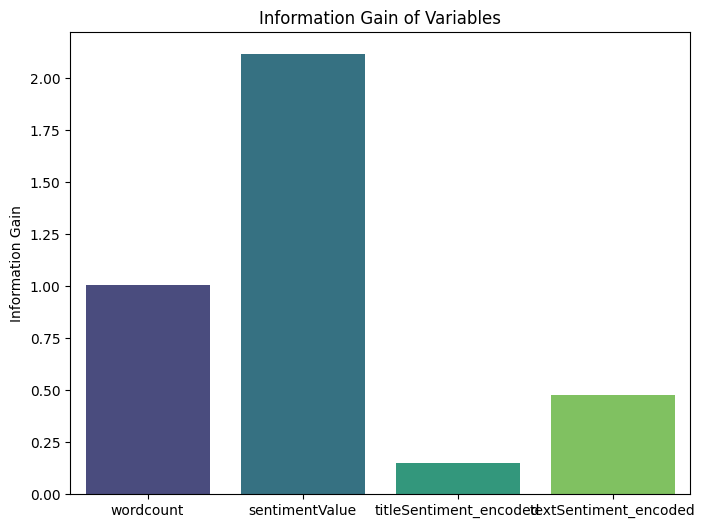

In [17]:
# Bar chart of information gain
plt.figure(figsize=(8, 6))
sns.barplot(x=list(info_gains.keys()), y=list(info_gains.values()), palette='viridis')
plt.title('Information Gain of Variables')
plt.ylabel('Information Gain')
plt.show()


## 1.6 Principal Component Analysis (PCA)

Standardize the Data:

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features including encoded sentiments
features = ['wordcount', 'sentimentValue', 'titleSentiment_encoded', 'textSentiment_encoded']

# Standardize features
x = df[features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Star Rating'] = df['Star Rating']

# Explained variance
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

Explained variance by component: [0.55513306 0.19153401]


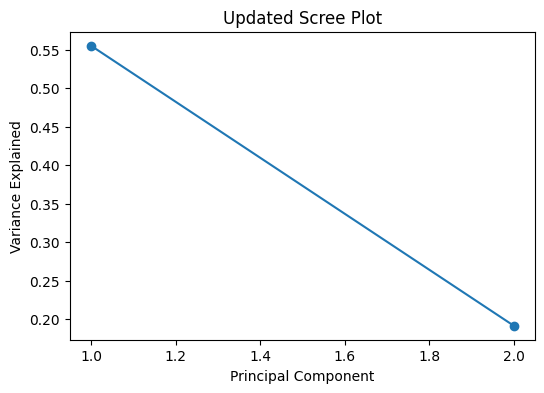

In [19]:
# Scree plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.title('Updated Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


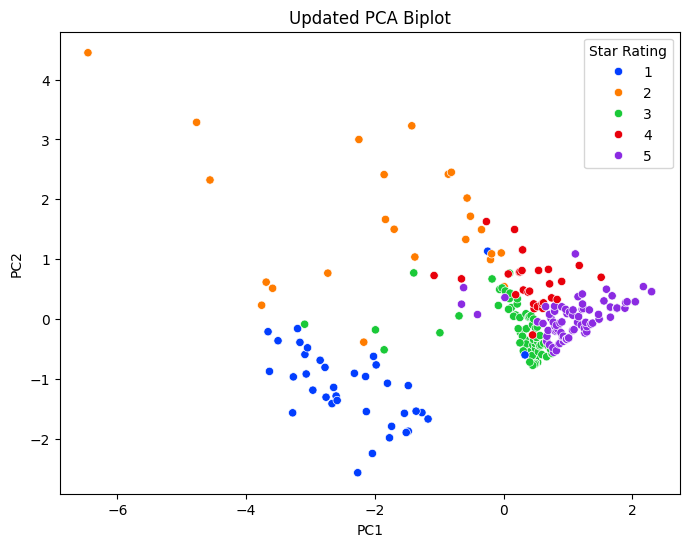

In [20]:
# Biplot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Star Rating', data=pca_df, palette='bright')
plt.title('Updated PCA Biplot')
plt.show()


# 2. Data Standardization and Normalization

In [21]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = ['PC1', 'PC2'] # TODO: Modificar esto e ir probando diferentes combinaciones
X = pca_df[features]
Y = pca_df['Star Rating']


Standardize features to have a mean of 0 and a standard deviation of 1.

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_std = scaler.fit_transform(X)

Normalize features to a range between 0 and 1.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit on training data and transform both training and testing data
X_norm = min_max_scaler.fit_transform(X)

In [24]:
# Create a DataFrame for plotting
X_std_df = pd.DataFrame(X_std, columns=features)
X_norm_df = pd.DataFrame(X_norm, columns=features)

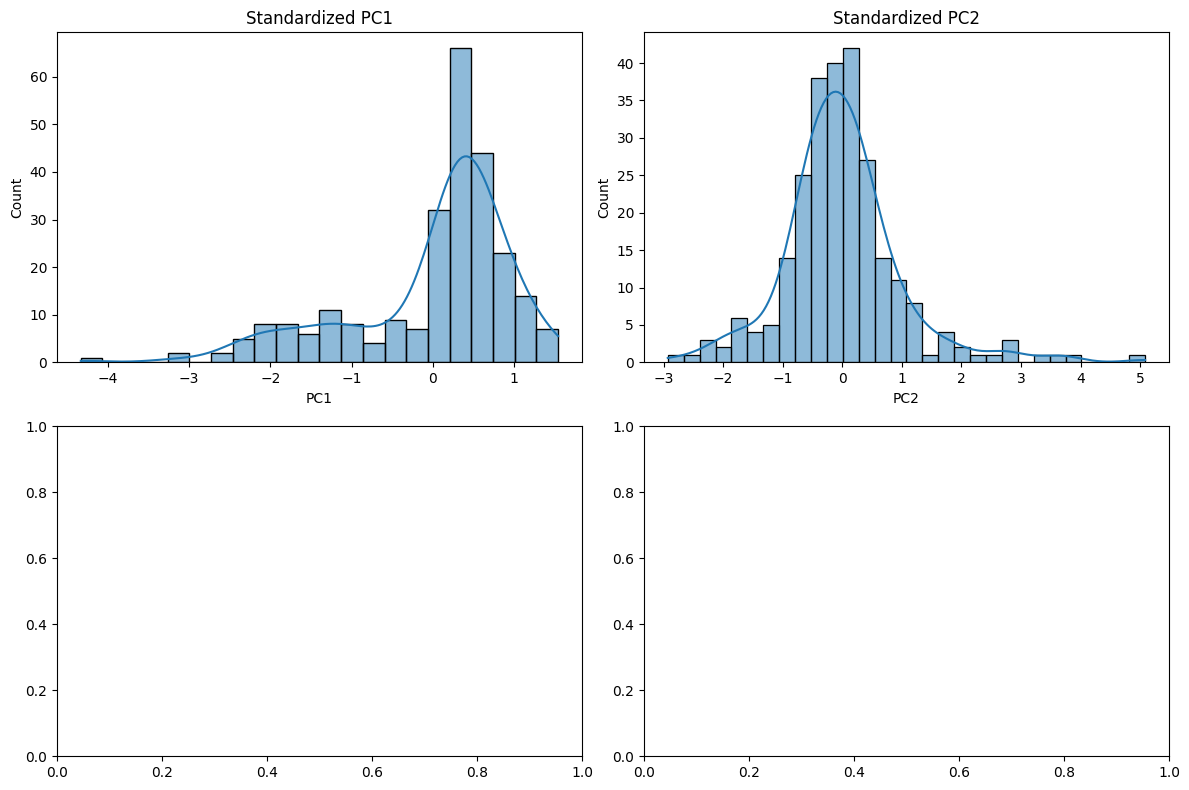

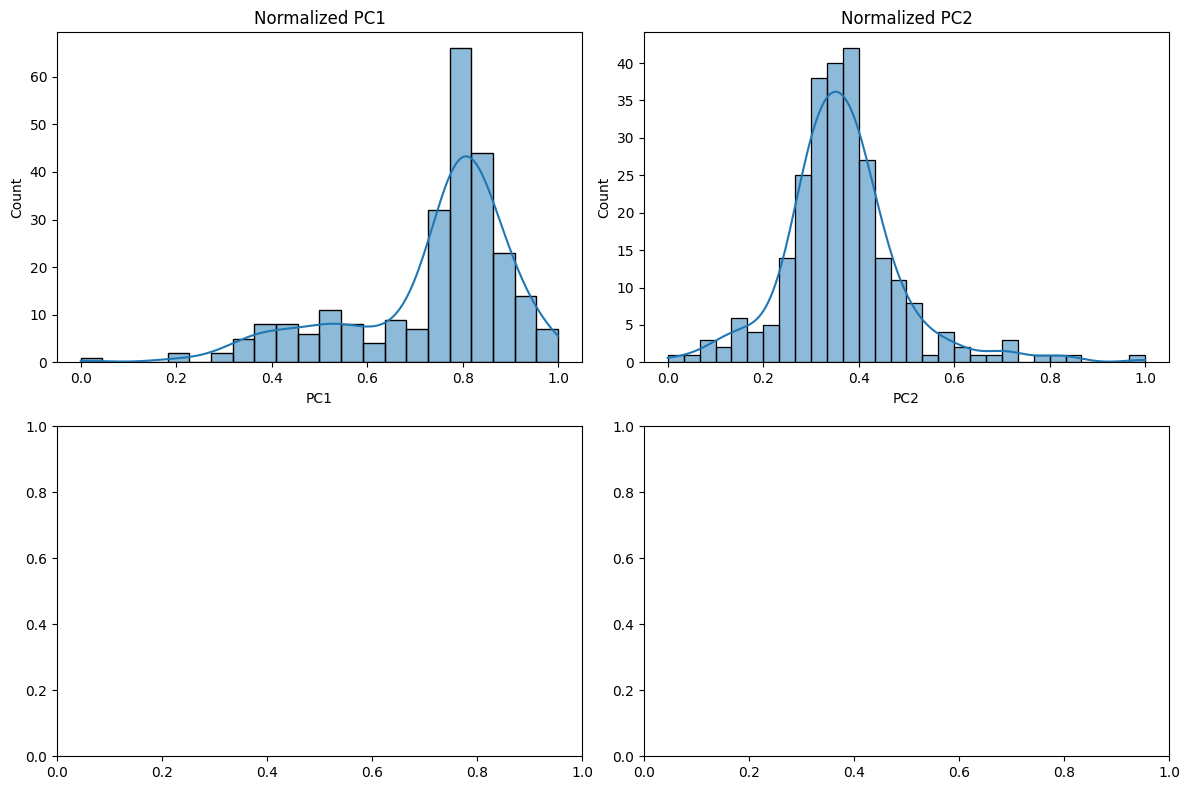

In [25]:
# Plot standardized features
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.histplot(X_std_df[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Standardized {feature}')
plt.tight_layout()
plt.show()

# Plot normalized features
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.histplot(X_norm_df[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Normalized {feature}')
plt.tight_layout()
plt.show()

# 3. Implementing K-NN and Weighted K-NN from Scratch

## 3.1 K-Nearest Neighbors (K-NN)

In [26]:
from collections import Counter

In [27]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

Define K-NN Function:

In [28]:
def knn_predict(X_train, y_train, X_test_instance, k):
    # Compute distances between X_test_instance and all X_train instances
    distances = np.linalg.norm(X_train - X_test_instance, axis=1)
    # Get the indices of the k nearest neighbors
    k_indices = distances.argsort()[:k]
    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train[k_indices]
    # Majority vote
    most_common = Counter(k_nearest_labels).most_common(1)
    predicted_class = most_common[0][0]
    # Calculate class scores (proportion of votes)
    class_counts = Counter(k_nearest_labels)
    total_votes = sum(class_counts.values())
    class_scores = {cls: count / total_votes for cls, count in class_counts.items()}
    return predicted_class, class_scores

Define Weighted K-NN Function:

In [29]:
def weighted_knn_predict(X_train, y_train, X_test_instance, k):
    # Compute distances
    distances = np.linalg.norm(X_train - X_test_instance, axis=1)
    # Get the indices of the k nearest neighbors
    k_indices = distances.argsort()[:k]
    # Get labels and distances of the k nearest neighbors
    k_nearest_labels = y_train[k_indices]
    k_nearest_distances = distances[k_indices]
    # Compute weights (inverse of distance)
    weights = 1 / (k_nearest_distances + 1e-5)  # Avoid division by zero
    # Calculate weighted votes
    class_weights = {}
    for label, weight in zip(k_nearest_labels, weights):
        class_weights[label] = class_weights.get(label, 0) + weight
    # Select the class with the highest total weight
    predicted_class = max(class_weights.items(), key=lambda x: x[1])[0]
    # Normalize weights to get class scores
    total_weight = sum(class_weights.values())
    class_scores = {cls: weight / total_weight for cls, weight in class_weights.items()}
    return predicted_class, class_scores

Define Cross-Validation Function

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

def cross_validate_knn(X, y, k_values, num_folds=10, weighted=False, random_state=42):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)
    classes = np.unique(y)
    n_classes = len(classes)
    avg_accuracies = {k: [] for k in k_values}
    fold = 1
    
    for train_index, test_index in kf.split(X):
        print(f"Processing fold {fold}/{num_folds}")
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        for k in k_values:
            preds = []
            for X_test_instance in X_test_fold:
                if weighted:
                    pred, _ = weighted_knn_predict(X_train_fold, y_train_fold, X_test_instance, k)
                else:
                    pred, _ = knn_predict(X_train_fold, y_train_fold, X_test_instance, k)
                preds.append(pred)
            acc = accuracy_score(y_test_fold, preds)
            avg_accuracies[k].append(acc)
        fold += 1
    
    # Compute average accuracies for each k
    for k in avg_accuracies:
        avg_accuracies[k] = np.mean(avg_accuracies[k])
    
    # Determine the best k
    best_k = max(avg_accuracies, key=avg_accuracies.get)
    print(f"Best k: {best_k} with accuracy: {avg_accuracies[best_k]:.4f}")
    
    return best_k, avg_accuracies

In [31]:
def cross_validate_knn_best_k(X, y, best_k, num_folds=10, weighted=False, random_state=42):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=random_state)
    classes = np.unique(y)
    n_classes = len(classes)
    all_y_true = []
    all_y_scores = []
    all_preds = []
    confusion_mat = np.zeros((n_classes, n_classes))
    fold = 1
    
    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        preds = []
        scores = []
        for X_test_instance in X_test_fold:
            if weighted:
                pred, class_scores = weighted_knn_predict(X_train_fold, y_train_fold, X_test_instance, best_k)
            else:
                pred, class_scores = knn_predict(X_train_fold, y_train_fold, X_test_instance, best_k)
            preds.append(pred)
            # Create a score vector aligned with the classes
            score_vector = [class_scores.get(cls, 0) for cls in classes]
            scores.append(score_vector)
        
        # Update confusion matrix
        cm = confusion_matrix(y_test_fold, preds, labels=classes)
        confusion_mat += cm
        
        # Collect true labels and scores
        all_y_true.extend(y_test_fold)
        all_y_scores.extend(scores)
        all_preds.extend(preds)
        
        fold += 1
    
    # Convert lists to arrays
    all_y_true = np.array(all_y_true)
    all_y_scores = np.array(all_y_scores)
    all_preds = np.array(all_preds)

    return confusion_mat, classes

## 3.2 Evaluate the Model

In [32]:
# Convert DataFrames to numpy arrays
X_scaled = X_std_df.values  # Use the scaled data (standardized or normalized)
y = Y.values

In [33]:
random_states = range(1, 1000, 100)         # Generate Random states
k_values = range(1, 21)                     # Testing k from 1 to 20

# Initialize lists to accumulate results across random states
avg_accuracies_knn_all_states = {k: [] for k in k_values}
avg_accuracies_weighted_knn_all_states = {k: [] for k in k_values}

# Iterate over random states
for random_state in random_states:
    best_k_knn, avg_accuracies_knn = cross_validate_knn(X_scaled, y, k_values, num_folds=10, weighted=False, random_state=random_state)
    best_k_weighted_knn, avg_accuracies_weighted_knn = cross_validate_knn(X_scaled, y, k_values, num_folds=10, weighted=True, random_state=random_state)

    # Accumulate accuracies for each k value across random states
    for k in k_values:
        avg_accuracies_knn_all_states[k].append(avg_accuracies_knn[k])
        avg_accuracies_weighted_knn_all_states[k].append(avg_accuracies_weighted_knn[k])

# Calculate the average accuracy and standard deviation across random states for each k
avg_accuracies_knn_mean = {k: np.mean(avg_accuracies_knn_all_states[k]) for k in k_values}
avg_accuracies_knn_std = {k: np.std(avg_accuracies_knn_all_states[k]) for k in k_values}
avg_accuracies_weighted_knn_mean = {k: np.mean(avg_accuracies_weighted_knn_all_states[k]) for k in k_values}
avg_accuracies_weighted_knn_std = {k: np.std(avg_accuracies_weighted_knn_all_states[k]) for k in k_values}

Processing fold 1/10
Processing fold 2/10
Processing fold 3/10
Processing fold 4/10
Processing fold 5/10
Processing fold 6/10
Processing fold 7/10
Processing fold 8/10
Processing fold 9/10
Processing fold 10/10
Best k: 4 with accuracy: 0.8635
Processing fold 1/10
Processing fold 2/10
Processing fold 3/10
Processing fold 4/10
Processing fold 5/10
Processing fold 6/10
Processing fold 7/10
Processing fold 8/10
Processing fold 9/10
Processing fold 10/10
Best k: 6 with accuracy: 0.8672
Processing fold 1/10
Processing fold 2/10
Processing fold 3/10
Processing fold 4/10
Processing fold 5/10
Processing fold 6/10
Processing fold 7/10
Processing fold 8/10
Processing fold 9/10
Processing fold 10/10
Best k: 6 with accuracy: 0.8526
Processing fold 1/10
Processing fold 2/10
Processing fold 3/10
Processing fold 4/10
Processing fold 5/10
Processing fold 6/10
Processing fold 7/10
Processing fold 8/10
Processing fold 9/10
Processing fold 10/10
Best k: 6 with accuracy: 0.8600
Processing fold 1/10
Process

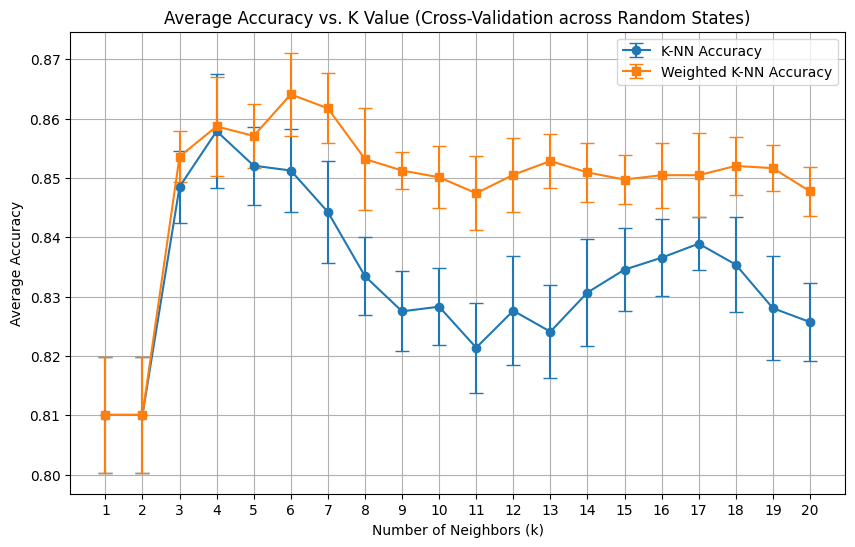

In [34]:
# Plot the average accuracies with error bars for different k values
plt.figure(figsize=(10, 6))

# Plot for unweighted K-NN
plt.errorbar(
    k_values, 
    [avg_accuracies_knn_mean[k] for k in k_values], 
    yerr=[avg_accuracies_knn_std[k] for k in k_values], 
    label='K-NN Accuracy', 
    marker='o', 
    capsize=5
)

# Plot for weighted K-NN
plt.errorbar(
    k_values, 
    [avg_accuracies_weighted_knn_mean[k] for k in k_values], 
    yerr=[avg_accuracies_weighted_knn_std[k] for k in k_values], 
    label='Weighted K-NN Accuracy', 
    marker='s', 
    capsize=5
)

plt.title('Average Accuracy vs. K Value (Cross-Validation across Random States)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(ticks=k_values)  # Ensure x-axis shows integer ticks only

# Save the plot
plt.savefig("output/avg_acc_different_k_with_error_bars.png")


## 4. Confusion Matrix for the best K

In [35]:
# For K-NN
confusion_mat_knn, classes = cross_validate_knn_best_k(X_scaled, y, best_k_knn, num_folds=10, weighted=False, random_state=42)

# For Weighted K-NN
confusion_mat_weighted_knn, classes = cross_validate_knn_best_k(X_scaled, y, best_k_weighted_knn, num_folds=10, weighted=True, random_state=42)


Plot Confusion Matrix for Best K

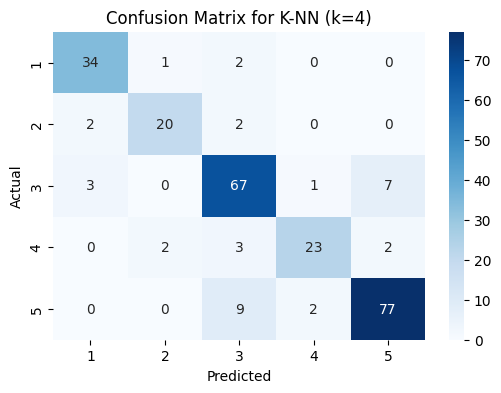

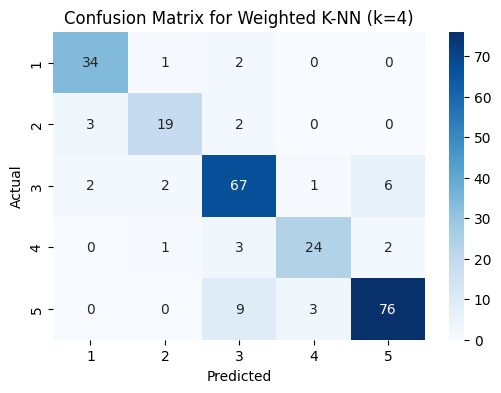

In [36]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(confusion_mat_knn, classes, f'Confusion Matrix for K-NN (k={best_k_knn})')
plot_confusion_matrix(confusion_mat_weighted_knn, classes, f'Confusion Matrix for Weighted K-NN (k={best_k_weighted_knn})')



## 5. Decision Boundary Visualization

In [37]:
from matplotlib.colors import ListedColormap


def plot_decision_boundaries_2d(X_train, y_train, k, weighted=False, feature_names=None):
    # Define the color maps for the plot
    cmap_light = ListedColormap(['#FFAAAA', '#8BD992', '#AAAAFF', '#F5E292', '#8B49A2'])  # Colors for the background
    cmap_bold = ['red', 'green', 'blue', 'orange', 'purple']  # Colors for the actual points

    # Create a mesh grid for plotting the decision boundaries
    h = 0.01  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    Z = []
    for xx1, yy1 in zip(xx.ravel(), yy.ravel()):
        X_test_instance = np.array([xx1, yy1])
        if weighted:
            pred, _ = weighted_knn_predict(X_train, y_train, X_test_instance, k)
        else:
            pred, _ = knn_predict(X_train, y_train, X_test_instance, k)
        Z.append(pred)
    
    Z = np.array(Z).reshape(xx.shape)

    # Plot the decision boundaries and training points
    plt.figure(figsize=(10, 8))

    # Use pcolormesh to plot the decision boundaries with proper handling of the background color
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto', alpha=0.8)

    # Plot the training points with the actual class labels
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=cmap_bold, edgecolor='k', s=20, zorder=2)

    # Label axes
    plt.xlabel(feature_names[0] if feature_names else 'Feature 1')
    plt.ylabel(feature_names[1] if feature_names else 'Feature 2')
    plt.title(f'Decision Boundaries (k={k}, Weighted={weighted})')
    plt.legend(title="Class")
    plt.show()

C:\Users\Tomas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


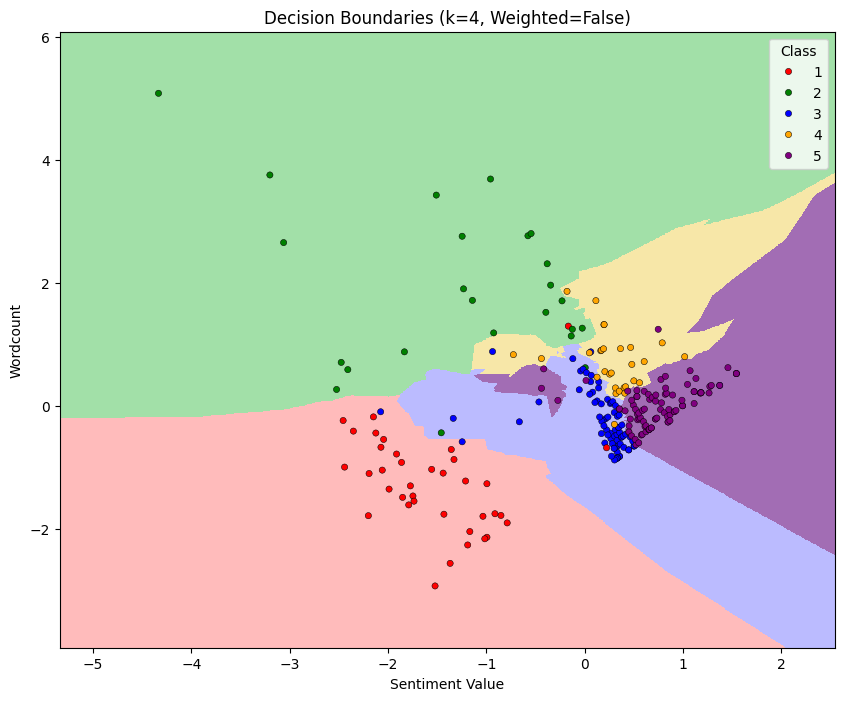

C:\Users\Tomas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


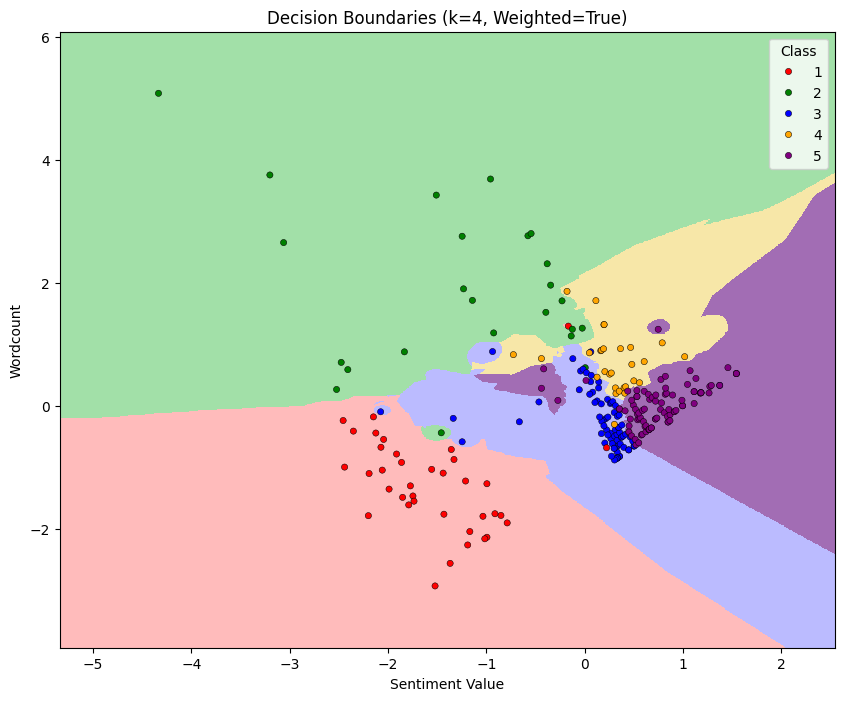

In [38]:
# Select two features
X_2d = X_scaled[:, [0, 1]]  # sentimentValue and wordcount

# Plot decision boundaries for K-NN
plot_decision_boundaries_2d(X_2d, y, best_k_knn, weighted=False, feature_names=['Sentiment Value', 'Wordcount'])

# Plot decision boundaries for Weighted K-NN
plot_decision_boundaries_2d(X_2d, y, best_k_weighted_knn, weighted=True, feature_names=['Sentiment Value', 'Wordcount'])
